In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
# loading the csv data file
df = pd.read_csv('/Users/siddharthsharma/Desktop/heart.csv')

In [4]:
# printing first 10 rows 
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [5]:
# printing last 10 rows 
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
# number of rows and columns
df.shape

(1025, 14)

In [7]:
df.size

14350

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [12]:
a = df.corr() 

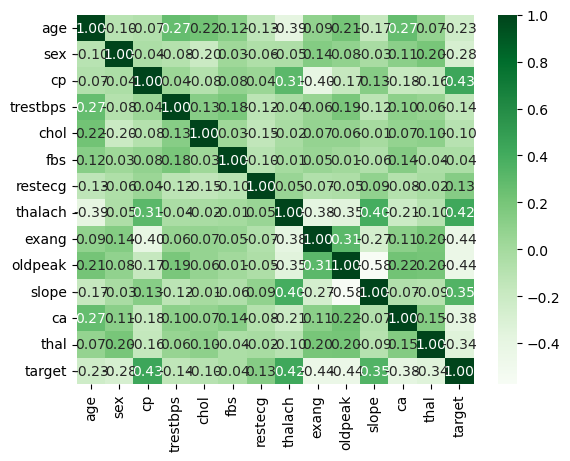

In [13]:
sns.heatmap(a,cbar = True,annot = True, fmt = ".2f",cmap ="Greens")
plt.show()

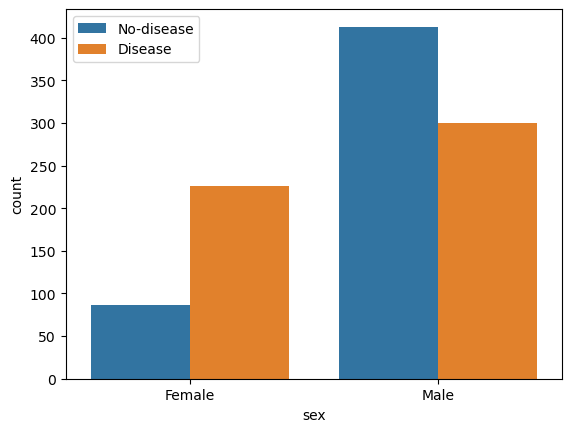

In [14]:
# to visualize the no.of persons wrt  target ad sex
sns.countplot(x ='sex', hue ="target", data = df)
plt.legend(labels = ["No-disease",'Disease'])
plt.xticks([0,1],["Female",'Male'])     
plt.show()

/var/folders/c7/m5l5y1317n73c7_wxsx7c5y00000gn/T/ipykernel_14469/883713869.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age, bins = 10 , color = 'purple')


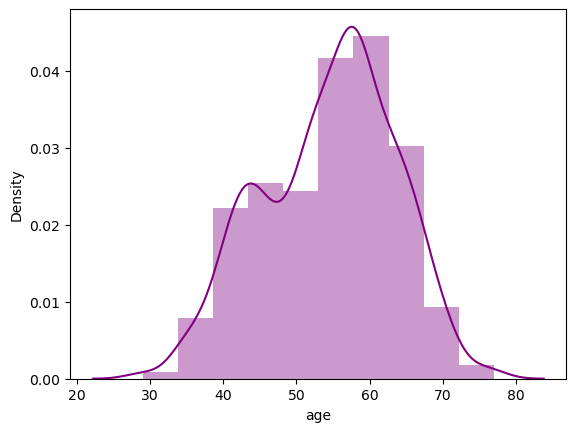

In [15]:
#to find the distribution of age within the dataset
sns.distplot(df.age, bins = 10 , color = 'purple')
plt.show()

In [16]:
#Checking Target Variable
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [17]:
#Splitting the features and target
X = df.drop(columns='target', axis=1)
Y = df['target']

In [18]:
# Hyperparameter tuning
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=2)

In [19]:
# Cross-validation
cross_val_scores = cross_val_score(model, X, Y, cv=5)
print("Cross-Validation Scores:", cross_val_scores)


Cross-Validation Scores: [0.85365854 0.84878049 0.82926829 0.82439024 0.79512195]


In [20]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [22]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [23]:
#Splitting the data into Traning and testing.

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [26]:
#traning Model 

In [27]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=2)

In [28]:
#training data
Y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_prediction, Y_train)

In [29]:
#checking model accuracy on traning and test data

In [30]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8536585365853658


In [31]:
#test data
Y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test_prediction, Y_test)

In [32]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8195121951219512


In [33]:
#RMSE and MAE for train data
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_prediction))
mae_train = mean_absolute_error(Y_train, Y_train_prediction)


In [34]:
print('Root Mean Squared Error (RMSE) on Training data: ', rmse_train)
print('Mean Absolute Error (MAE) on Training data: ', mae_train)


Root Mean Squared Error (RMSE) on Training data:  0.38254602783800296
Mean Absolute Error (MAE) on Training data:  0.14634146341463414


In [35]:
#RMSE and MAE for test data
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_prediction))
mae_test = mean_absolute_error(Y_test, Y_test_prediction)


In [36]:
print('Root Mean Squared Error (RMSE) on Test data: ', rmse_test)
print('Mean Absolute Error (MAE) on Test data: ', mae_test)

Root Mean Squared Error (RMSE) on Test data:  0.42483856331322933
Mean Absolute Error (MAE) on Test data:  0.18048780487804877


In [37]:
#confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_test_prediction)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[84 16]
 [21 84]]


In [38]:
# Precision, Recall, and F1 Score for training data
precision_train = precision_score(Y_train, Y_train_prediction)
recall_train = recall_score(Y_train, Y_train_prediction)
f1_train = f1_score(Y_train, Y_train_prediction)

In [39]:
# Print Precision, Recall, and F1 Score for training data
print('Precision on Training data: ', precision_train)
print('Recall on Training data: ', recall_train)
print('F1 Score on Training data: ', f1_train)

Precision on Training data:  0.8626506024096385
Recall on Training data:  0.850356294536817
F1 Score on Training data:  0.8564593301435407


In [40]:

# Precision, Recall, and F1 Score for test data
precision = precision_score(Y_test, Y_test_prediction)
recall = recall_score(Y_test, Y_test_prediction)
f1 = f1_score(Y_test, Y_test_prediction)

In [41]:
# Print Precision, Recall, and F1 Score for test data
print('Precision on Test data: ', precision)
print('Recall on Test data: ', recall)
print('F1 Score on Test data: ', f1)

Precision on Test data:  0.84
Recall on Test data:  0.8
F1 Score on Test data:  0.8195121951219512


In [42]:
#System that predict heart disease

In [43]:
input_data = (34,0,1,118,210,0,1,192,0,0.7,2,0,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/Users/siddharthsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
